<a href="https://colab.research.google.com/github/nimeshayasith/Computer_vision_Assignment/blob/main/4624_Question_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- STEP 1: RECONNECT GOOGLE DRIVE (Fixes Error 107) ---
from google.colab import drive
import os

# Force a remount to re-establish the broken connection
drive.mount('/content/drive', force_remount=True)

# Point back to your project folder
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path):
    os.chdir(project_path)
    print("Drive reconnected and directory set successfully!")
else:
    print("Drive mounted, but folder not found. Please check your folder name.")

Mounted at /content/drive
Drive reconnected and directory set successfully!


In [ ]:
import os

# Update this path if you named your folder something else
project_path = '/content/drive/MyDrive/CV_Assessment_01'

# Change the current working directory
os.chdir(project_path)

# Verify you are in the right place
print("Current Working Directory:", os.getcwd())
print("Files in Dataset folder:", os.listdir('Dataset'))

Current Working Directory: /content/drive/MyDrive/CV_Assessment_01
Files in Dataset folder: ['IPCV_ ASSIGNMENT_01_DATABASE.zip', 'IPCV_ ASSIGNMENT_01_DATABASE']


--- Morphological Features (from Closed Image) ---
Object 1: Area = 1046478.0 pixels, Perimeter = 4106.5 pixels


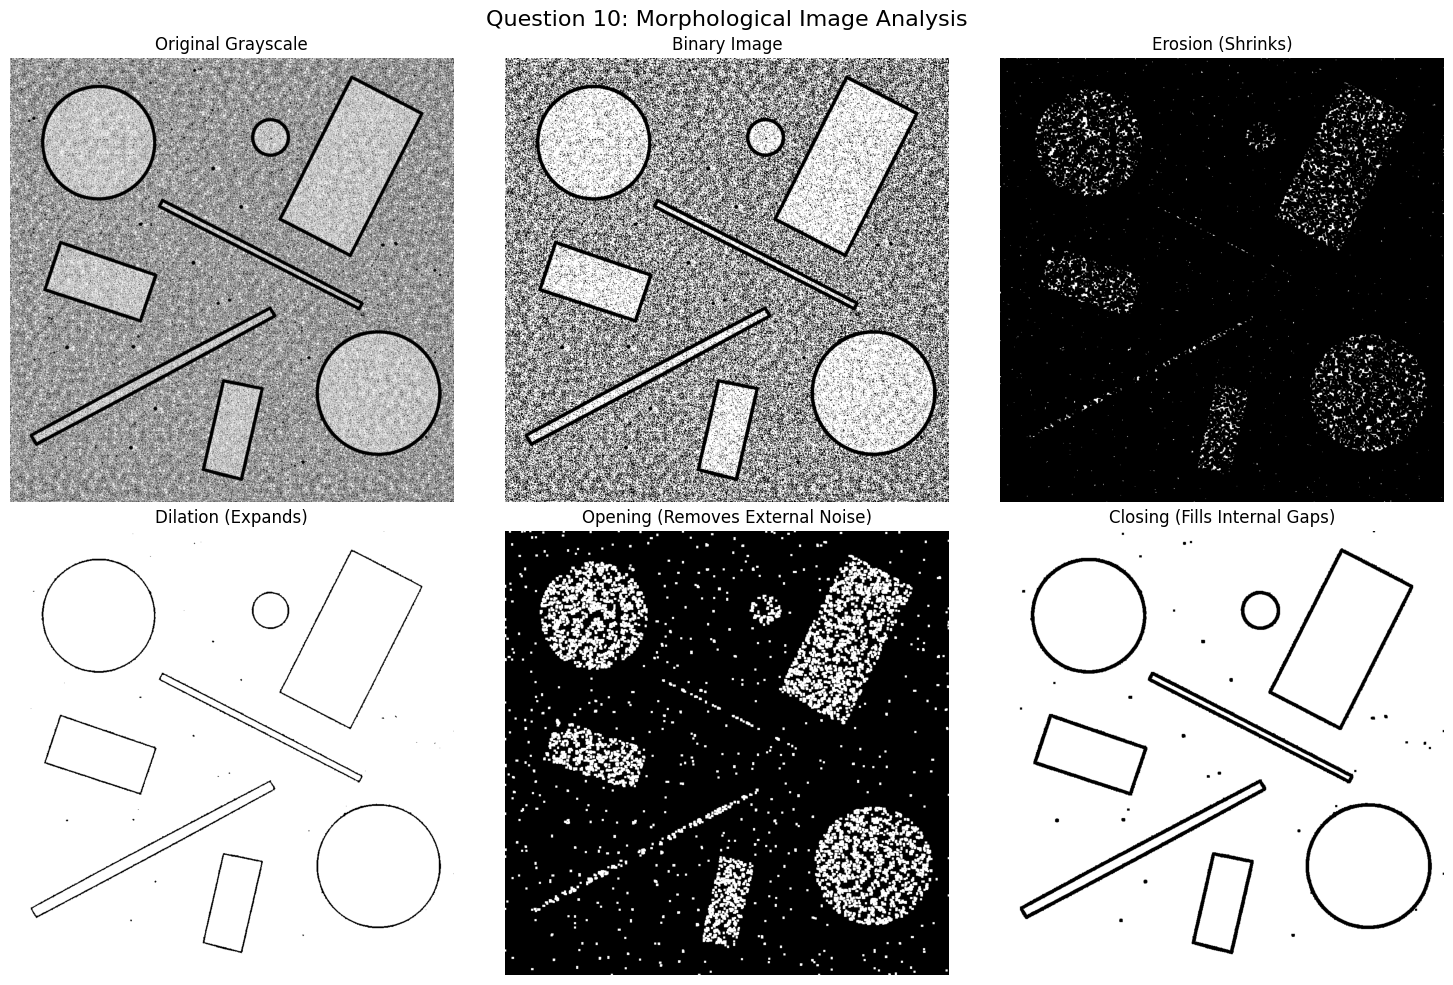

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load the Image and Convert to Binary ---
img_6_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Images_ For_Preliminary_Part/Image_6.jpg'
img_6 = cv2.imread(img_6_path, cv2.IMREAD_GRAYSCALE)

if img_6 is None:
    print(f"Error: Could not load {img_6_path}.")
else:
    # Convert to binary using Otsu's Thresholding (automatically finds the best threshold value)
    _, binary_img = cv2.threshold(img_6, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # --- 2. Define the Structuring Element ---
    # A 5x5 rectangular kernel is usually a safe default for general morphological cleaning
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

    # --- 3. Apply Morphological Operations ---
    eroded_img = cv2.erode(binary_img, kernel, iterations=1)
    dilated_img = cv2.dilate(binary_img, kernel, iterations=1)
    opened_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
    closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

    # --- 4. Feature Extraction (Area and Perimeter) ---
    # We will extract features from the 'Closed' image, assuming it's the cleanest version
    # (or you can use 'Opened' depending on which noise is worse in the specific image).
    print("--- Morphological Features (from Closed Image) ---")
    contours, _ = cv2.findContours(closed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True) # True means the shape is closed
        # Filter out tiny noise contours just in case
        if area > 100:
            print(f"Object {i+1}: Area = {area:.1f} pixels, Perimeter = {perimeter:.1f} pixels")

    # --- 5. PLOTTING FOR REPORT ---
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle("Question 10: Morphological Image Analysis", fontsize=16)

    axes[0, 0].imshow(img_6, cmap='gray')
    axes[0, 0].set_title("Original Grayscale")
    axes[0, 0].axis('off')

    axes[0, 1].imshow(binary_img, cmap='gray')
    axes[0, 1].set_title("Binary Image")
    axes[0, 1].axis('off')

    axes[0, 2].imshow(eroded_img, cmap='gray')
    axes[0, 2].set_title("Erosion (Shrinks)")
    axes[0, 2].axis('off')

    axes[1, 0].imshow(dilated_img, cmap='gray')
    axes[1, 0].set_title("Dilation (Expands)")
    axes[1, 0].axis('off')

    axes[1, 1].imshow(opened_img, cmap='gray')
    axes[1, 1].set_title("Opening (Removes External Noise)")
    axes[1, 1].axis('off')

    axes[1, 2].imshow(closed_img, cmap='gray')
    axes[1, 2].set_title("Closing (Fills Internal Gaps)")
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()